In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import pandas as pd
import numpy as np
import operator
import numpy as np
import datetime
from pylab import *

In [15]:
# load data
prefices = [
    "jan",
    "feb",
    "mar",
    "apr",
    "may",
    "jun",
    "total"
]
prefix = "jan"

df = pd.read_csv("../data/hackathon/data/workable/mentions/" + prefix + "-17_mentions3.csv")
# get all column names which are women MP twitter handles
mp_immutable_columns = [col_name for col_name in df.columns if "@" in col_name]
del df

In [16]:
len(mp_immutable_columns)

177

### 1. How much abuse does every woman MP receive?

#### in total

In [17]:
abuse_per_woman_df = pd.DataFrame(index=prefices, columns=mp_immutable_columns)

for prefix in prefices:
    if prefix == "total":
        continue
    df = pd.read_csv("../data/hackathon/data/workable/sentiment/" + prefix + "-17_sentiment.csv")
    abuse_per_woman = {}
    for col_name in mp_immutable_columns:
        abuse_per_woman[col_name] = df[col_name].sum()
    print(prefix, "->",sorted(abuse_per_woman.items(), key=operator.itemgetter(1), reverse=True)[:5])
    abuse_per_woman_df.ix[prefix] = abuse_per_woman

# total abuse per woman
total = abuse_per_woman_df.apply(np.sum)
abuse_per_woman_df.ix['total'] = total
print("total ->", abuse_per_woman_df.ix['total'].sort_values(ascending=False).head())

abuse_per_woman_df.to_csv("../results/abuse_per_MP_total.csv")

jan -> [('@HackneyAbbott', 647), ('@Anna_Soubry', 216), ('@EmilyThornberry', 205), ('@TasminaSheikh', 172), ('@jessphillips', 169)]
feb -> [('@HackneyAbbott', 1896), ('@HarrietHarman', 304), ('@jessphillips', 212), ('@CarolineLucas', 202), ('@joannaccherry', 189)]
mar -> [('@HackneyAbbott', 385), ('@joannaccherry', 320), ('@Anna_Soubry', 294), ('@jessphillips', 245), ('@TasminaSheikh', 210)]
apr -> [('@HackneyAbbott', 1137), ('@jessphillips', 229), ('@EmilyThornberry', 183), ('@joannaccherry', 179), ('@CarolineLucas', 166)]
may -> [('@HackneyAbbott', 2563), ('@EmilyThornberry', 347), ('@AmberRuddHR', 291), ('@joannaccherry', 254), ('@AngelaRayner', 238)]
jun -> [('@HackneyAbbott', 1493), ('@AmberRuddHR', 56), ('@DawnButlerBrent', 47), ('@TulipSiddiq', 34), ('@NazShahBfd', 31)]
total -> @HackneyAbbott      8121
@joannaccherry      1025
@EmilyThornberry    1023
@jessphillips       1002
@Anna_Soubry         875
Name: total, dtype: int64


#### 6-weeks before election

In [18]:
prefices_election = [
    "apr",
    "may",
    "jun",
    "total"
]

In [30]:
def get_electoral_abuse(cnt):
    for prefix in prefices_election:
        if prefix == "total":
            continue
        df_e = pd.read_csv("../data/hackathon/data/workable/sentiment/"+ prefix +"-17_sentiment.csv")
        df_e['Date (GMT)'] =  pd.to_datetime(df_e['Date (GMT)'], format='%Y-%m-%d %H:%M:%S')
        df_e = df_e[df_e['Date (GMT)'] > datetime.date(year=2017,month=4,day=17)]
        cnt += df_e.shape[0]
    return cnt

In [32]:
abuse_per_woman_df_election = pd.DataFrame(index=prefices, columns=mp_immutable_columns)

cnt = 0
electoral_amount_of_abuse = get_electoral_abuse(cnt)

for prefix in prefices_election:
    if(prefix == "total"):
        continue
    df = pd.read_csv("../data/hackathon/data/workable/sentiment/" + prefix + "-17_sentiment.csv")
    df['Date (GMT)'] =  pd.to_datetime(df['Date (GMT)'], format='%Y-%m-%d %H:%M:%S')
    df = df[df['Date (GMT)'] > datetime.date(year=2017,month=4,day=17)]
    abuse_per_woman = {}
    for col_name in mp_immutable_columns:
        abuse_per_woman[col_name] = df[col_name].sum()
    abuse_per_woman_df_election.ix[prefix] = abuse_per_woman

# total abuse per woman
total = abuse_per_woman_df_election.apply(np.sum)
abuse_per_woman_df_election.ix['total'] = total
print("total ->", abuse_per_woman_df_election.ix['total'].sort_values(ascending=False).head())

abuse_per_woman_df_election.to_csv("../results/abuse_per_MP_elections.csv")

total -> @HackneyAbbott      4512
@EmilyThornberry     458
@joannaccherry       368
@AmberRuddHR         347
@AngelaRayner        303
Name: total, dtype: object


In [33]:
electoral_amount_of_abuse

9995

### 2. How much abuse per category?

In [10]:
category_columns = [
    "General Abuse",
    "Sexist",
    "Racial",
    "Violent"
]

In [11]:
abuse_per_category_df = pd.DataFrame(index=prefices, columns=category_columns)

for prefix in prefices:
    if prefix == "total":
        continue
    df = pd.read_csv("../data/hackathon/data/workable_data/" + prefix + "-17_workable.csv")
    temp_list = {}
    for col_name in category_columns:
        temp_list[col_name] = df[col_name].sum()
    print(prefix, "->",sorted(temp_list.items(), key=operator.itemgetter(1), reverse=True)[:5])
    abuse_per_category_df.ix[prefix] = temp_list

# total abuse per woman
total = abuse_per_category_df.apply(np.sum)
abuse_per_category_df.ix['total'] = total
print("total ->", abuse_per_category_df.ix['total'].sort_values(ascending=False).head())

jan -> [('General Abuse', 4602.0), ('Racial', 1047.0), ('Sexist', 978.0), ('Violent', 312.0)]


/home/katia/.virtualenvs/securaxis/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


feb -> [('General Abuse', 6594.0), ('Sexist', 1519.0), ('Racial', 858.0), ('Violent', 370.0)]
mar -> [('General Abuse', 3360.0), ('Sexist', 1151.0), ('Racial', 685.0), ('Violent', 229.0)]
apr -> [('General Abuse', 5755.0), ('Sexist', 1702.0), ('Racial', 703.0), ('Violent', 300.0)]
may -> [('General Abuse', 5810.0), ('Sexist', 1461.0), ('Racial', 907.0), ('Violent', 369.0)]
jun -> [('General Abuse', 2041.0), ('Sexist', 408.0), ('Racial', 279.0), ('Violent', 116.0)]
total -> General Abuse    28162
Sexist            7219
Racial            4479
Violent           1696
Name: total, dtype: int64


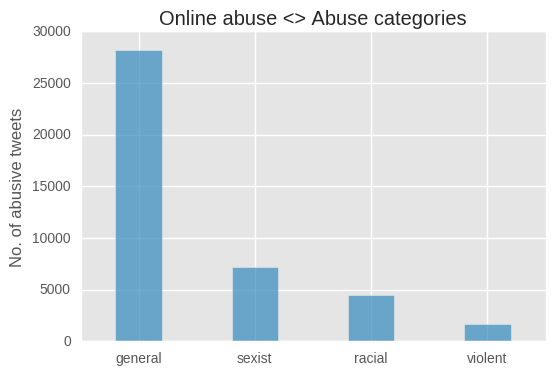

In [12]:
races = [28162,7219,4479,1696]
labels = ["general", "sexist", "racial", "violent"]

y_pos = np.arange(len(races))
plt.bar(
    y_pos,
    races,
    align="center",
    alpha=0.7,
    width=0.4
)
plt.xticks(y_pos, labels)
plt.ylabel('No. of abusive tweets')

plt.title("Online abuse <> Abuse categories")
plt.savefig('../results/categories_pie_chart.png')

In [13]:
exclude_da = True
da_handle = "@HackneyAbbott"

In [14]:
abuse_per_category_df = pd.DataFrame(index=prefices, columns=category_columns)

for prefix in prefices:
    if prefix == "total":
        continue
    df = pd.read_csv("../data/hackathon/data/workable_data/" + prefix + "-17_workable.csv")
    if exclude_da:
        df = df[df[da_handle] == 0]
    temp_list = {}
    for col_name in category_columns:
        temp_list[col_name] = df[col_name].sum()
    print(prefix, "->",sorted(temp_list.items(), key=operator.itemgetter(1), reverse=True)[:5])
    abuse_per_category_df.ix[prefix] = temp_list

# total abuse per woman
total = abuse_per_category_df.apply(np.sum)
abuse_per_category_df.ix['total'] = total
print("total ->", abuse_per_category_df.ix['total'].sort_values(ascending=False).head())

jan -> [('General Abuse', 3806.0), ('Racial', 948.0), ('Sexist', 808.0), ('Violent', 241.0)]


/home/katia/.virtualenvs/securaxis/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


feb -> [('General Abuse', 3821.0), ('Sexist', 1024.0), ('Racial', 708.0), ('Violent', 268.0)]
mar -> [('General Abuse', 2851.0), ('Sexist', 1059.0), ('Racial', 624.0), ('Violent', 211.0)]
apr -> [('General Abuse', 3531.0), ('Sexist', 1349.0), ('Racial', 539.0), ('Violent', 241.0)]
may -> [('General Abuse', 3471.0), ('Sexist', 934.0), ('Racial', 771.0), ('Violent', 265.0)]
jun -> [('General Abuse', 476.0), ('Racial', 220.0), ('Sexist', 98.0), ('Violent', 14.0)]
total -> General Abuse    17956
Sexist            5272
Racial            3810
Violent           1240
Name: total, dtype: int64


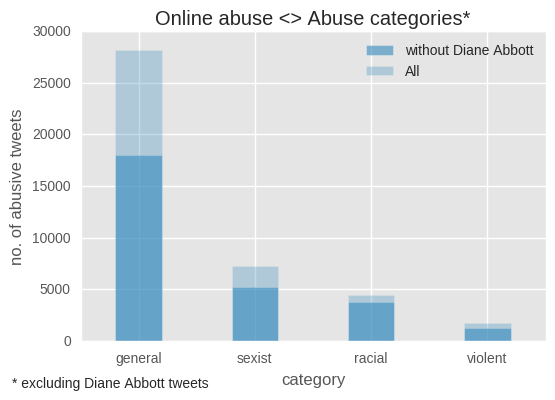

In [15]:
races = [17956,5272,3810,1240]
races_with_da = [28162,7219,4479,1696]
labels = ["general", "sexist", "racial", "violent"]

y_pos = np.arange(len(races))
plt.bar(
    y_pos,
    races,
    align="center",
    alpha=0.6,
    width=0.4
)

y_pos = np.arange(len(races))
plt.bar(
    y_pos,
    races_with_da,
    align="center",
    alpha=0.3,
    width=0.4
)

plt.xticks(y_pos, labels)
plt.ylabel('no. of abusive tweets')
plt.xlabel('category')

plt.title("Online abuse <> Abuse categories*")
plt.legend(["without Diane Abbott", "All"])

figtext(.01, .01, "* excluding Diane Abbott tweets")
plt.savefig('../results/categories_no_ABBOTT_pie_chart.png')

### 3. How much abuse per enthnicity?

In [35]:
# load mp data
mp_data = pd.read_csv("../data/Hackathon Women MP Data 1506.csv")
race_col = "Ethnic minority"
races = mp_data[race_col]
races.value_counts()

White    162
Asian     16
Black      4
Name: Ethnic minority, dtype: int64

In [36]:
races = mp_data[race_col].value_counts()
parties = mp_data.party
parties.value_counts().head(3)

Labour                     86
Conservative               64
Scottish National Party    20
Name: party, dtype: int64

In [37]:
race_list = list(races.index)

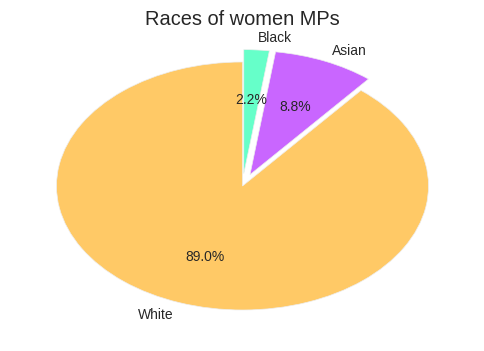

In [38]:
fig1, ax1 = plt.subplots()
explode = (0, 0.1, 0.1)  # only "explode" the 1nd slice (i.e. 'White')
ax1.pie(
    races,
    explode=explode,
    labels=races.index,
    autopct='%1.1f%%',
    shadow=False,
    colors = ["#ffc966", "#c966ff", "#66ffc9"],
    startangle=90)

plt.title("Races of women MPs")
plt.savefig('../results/races_pic_chart.png')

In [39]:
black_twitter_handles =["@"+h for h in list(mp_data[mp_data[race_col] == "Black"].twitter_username)]
asian_twitter_handles =["@"+h for h in list(mp_data[mp_data[race_col] == "Asian"].twitter_username)]
white_twitter_handles =["@"+h for h in list(mp_data[mp_data[race_col] == "White"].twitter_username) if type(h) == str]

In [40]:
enthic_abuse = [0,0,0]
race_list

['White', 'Asian', 'Black']

In [42]:
## how much abuse per enthicity - create an abuse column
for prefix in prefices:
    if prefix == "total":
        continue
    df = pd.read_csv("../data/hackathon/data/workable/sentiment/"+ prefix + "-17_sentiment.csv")
    black_abuse = df[black_twitter_handles]
    asian_abuse = df[asian_twitter_handles]
    white_abuse = df[white_twitter_handles]
    old_cnt = enthic_abuse[2]
    enthic_abuse[2] = old_cnt + black_abuse.sum().sum()
    old_cnt = enthic_abuse[1]
    enthic_abuse[1] = old_cnt + asian_abuse.sum().sum()
    old_cnt = enthic_abuse[0]
    enthic_abuse[0] = old_cnt + white_abuse.sum().sum()

In [43]:
enthic_abuse

[14932, 2117, 8345]

In [44]:
days = 159
enthic_abuse = [(enthic_abuse[0]/162)/159, (enthic_abuse[1]/16)/159, (enthic_abuse[2]/4)/159]
enthic_abuse

[0.57970339312058383, 0.83215408805031443, 13.121069182389936]

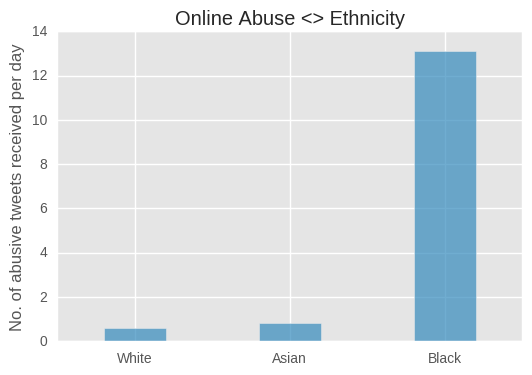

In [45]:
y_pos = np.arange(len(enthic_abuse))
plt.bar(
    y_pos,
    enthic_abuse,
    align="center",
    alpha=0.7,
    width=0.4
)
plt.xticks(y_pos, race_list)
plt.ylabel('No. of abusive tweets received per day')
plt.title('Online Abuse <> Ethnicity')

plt.savefig('../results/online_abuse_ethnicity_bar_chart.png')

In [46]:
exclude_da = True
da_handle = "@HackneyAbbott"
enthic_abuse = [0,0,0]
race_list = ["White", "Asian", "Black"]
race_col = "Ethnic minority"

In [47]:
black_twitter_handles =["@"+h for h in list(mp_data[mp_data[race_col] == "Black"].twitter_username) if h != "HackneyAbbott"]
asian_twitter_handles =["@"+h for h in list(mp_data[mp_data[race_col] == "Asian"].twitter_username)]
white_twitter_handles =["@"+h for h in list(mp_data[mp_data[race_col] == "White"].twitter_username) if type(h) == str]

In [48]:
## how much abuse per enthicity - create an abuse column
for prefix in prefices:
    if prefix == "total":
        continue
    df = pd.read_csv("../data/hackathon/data/workable/sentiment/"+ prefix + "-17_sentiment.csv")
    black_abuse = df[black_twitter_handles]
    asian_abuse = df[asian_twitter_handles]
    white_abuse = df[white_twitter_handles]
    old_cnt = enthic_abuse[2]
    enthic_abuse[2] = old_cnt + black_abuse.sum().sum()
    old_cnt = enthic_abuse[1]
    enthic_abuse[1] = old_cnt + asian_abuse.sum().sum()
    old_cnt = enthic_abuse[0]
    enthic_abuse[0] = old_cnt + white_abuse.sum().sum()

In [49]:
enthic_abuse

[14932, 2117, 224]

In [50]:
no_diane = [14932, 2117, 224]
with_diane = [14932, 2117, 8345]

In [57]:
(14932/162), (2117/16), 8345/4, 8345/3

(92.17283950617283, 132.3125, 2086.25, 2781.6666666666665)

In [55]:
days = 159
enthic_abuse = [(enthic_abuse[0]/162)/159, (enthic_abuse[1]/16)/159, (enthic_abuse[2]/4)/159]
no_diane = [(14932/162)/159, (2117/16)/159, (244/3)/159]
with_diane = [(14932/162)/159, (2117/16)/159, (8345/4)/159]
with_diane, no_diane

([0.5797033931205838, 0.8321540880503144, 13.121069182389936],
 [0.5797033931205838, 0.8321540880503144, 0.5115303983228511])

In [61]:
import pylab

/home/katia/.virtualenvs/securaxis/lib/python3.5/site-packages/matplotlib/legend.py:325: UserWarning: Unrecognized location "upper-left". Falling back on "best"; valid locations are
	lower center
	lower left
	lower right
	best
	right
	center
	center right
	upper center
	upper left
	center left
	upper right

  six.iterkeys(self.codes))))


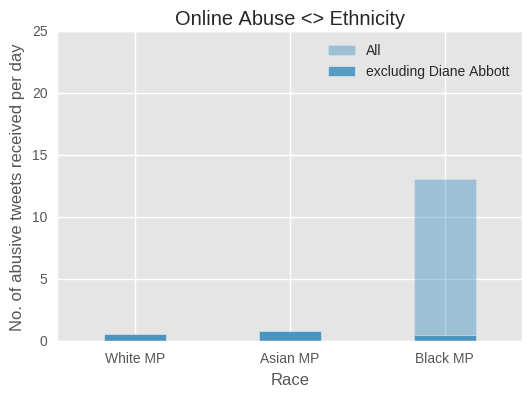

In [62]:
y_pos = np.arange(len(enthic_abuse))
plt.bar(
    y_pos,
    with_diane,
    align="center",
    alpha=0.4,
    width=0.4
)

plt.bar(
    y_pos,
    no_diane,
    align="center",
    alpha=0.8,
    width=0.4
)
plt.legend(["All", "excluding Diane Abbott"], loc="upper-left")
plt.xticks(y_pos, ["White MP", "Asian MP", "Black MP"])
plt.xlabel("Race")
plt.ylabel('No. of abusive tweets received per day')
pylab.ylim([0,25])
plt.title('Online Abuse <> Ethnicity')

plt.savefig('../results/online_abuse_ethnicity_bar_chart_comparison.png')

### 4. How much abuse per party?

In [63]:
# load mp data
mp_data = pd.read_csv("../data/Hackathon Women MP Data 1506.csv")
race_col = "party"
races = mp_data[race_col]
race_list = list(races.index)
races = races.value_counts()
races.ix['Other'] = 13
del races["Social Democratic and Labour Party"]
del races["Green"]
del races["Plaid Cymru"]
del races["Liberal Democrat"]
del races["Labour/Co-operative"]
races

Labour                     86
Conservative               64
Scottish National Party    20
Other                      13
Name: party, dtype: int64

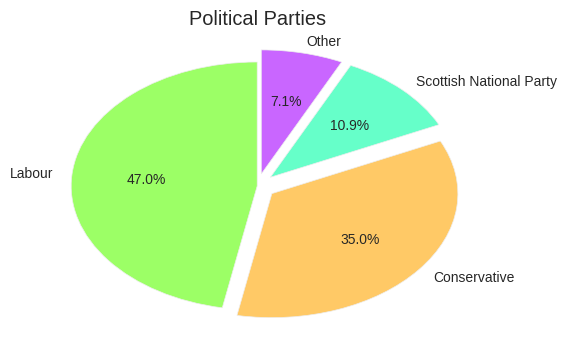

In [64]:
fig1, ax1 = plt.subplots()
explode = (0, 0.1, 0.1, 0.1)  # only "explode" the 1nd slice (i.e. 'White')
ax1.pie(
    races,
    explode=explode,
    labels=races.index,
    autopct='%1.1f%%',
    shadow=False,
    colors = ["#9cff66", "#ffc966", "#66ffc9", "#c966ff"],
    startangle=90)
plt.title("Political Parties")
plt.savefig('../results/parties_pic_chart.png')

In [65]:
enthic_abuse = [0,0,0,0]
race_list = ["Labour", "Conservative", "Scotish National Party", "Other"]

In [66]:
labour =["@"+h for h in list(mp_data[mp_data[race_col] == "Labour"].twitter_username) if type(h) == str]
conservative =["@"+h for h in list(mp_data[mp_data[race_col] == "Conservative"].twitter_username) if type(h) == str]
other=["@"+h for h in list(mp_data[mp_data[race_col] == "Other"].twitter_username) if type(h) == str]
scottish =["@"+h for h in list(mp_data[mp_data[race_col] == "Scottish National Party"].twitter_username) if type(h) == str]

In [68]:
prefixes = [
    "jan",
    "feb",
    "mar",
    "apr",
    "may",
    "jun"
]

In [77]:
## how much abuse per party
for prefix in prefixes:
    df = pd.read_csv("../data/hackathon/data/workable/sentiment/"+ prefix + "-17_sentiment.csv")
    labour_abuse = df[labour]
    conservative_abuse = df[conservative]
    scottish_abuse = df[scottish]
    other_abuse = df[other]
    old_cnt = enthic_abuse[3]
    enthic_abuse[3] = old_cnt + other_abuse.sum().sum()
    old_cnt = enthic_abuse[2]
    enthic_abuse[2] = old_cnt + scottish_abuse.sum().sum()
    old_cnt = enthic_abuse[1]
    enthic_abuse[1] = old_cnt + conservative_abuse.sum().sum()
    old_cnt = enthic_abuse[0]
    enthic_abuse[0] = old_cnt + labour_abuse.sum().sum()

In [78]:
enthic_abuse

[17536.282454465458, 3378.3319901687842, 2657.8357973379216, 0.0]

In [79]:
enthic_abuse = [(enthic_abuse[0]/86), (enthic_abuse[1]/64), (enthic_abuse[2]/20), (enthic_abuse[3]/13)]

In [80]:
enthic_abuse

[203.91026109843554, 52.786437346387252, 132.89178986689609, 0.0]

In [81]:
days = 159
enthic_abuse = [(enthic_abuse[0]/86)/159, (enthic_abuse[1]/64)/159, (enthic_abuse[2]/20)/159, (enthic_abuse[3]/13)/159]
enthic_abuse

[0.014912261306014007, 0.0051873464373415144, 0.041789871027325814, 0.0]

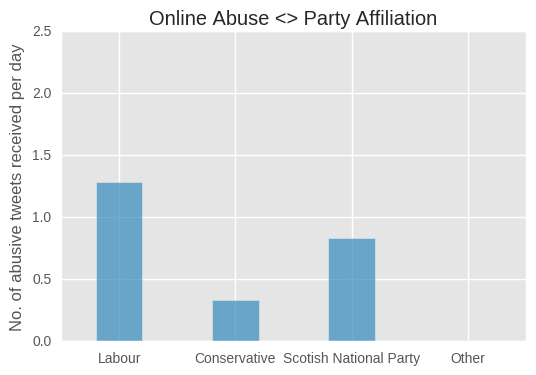

In [72]:
y_pos = np.arange(len(enthic_abuse))
plt.bar(
    y_pos,
    enthic_abuse,
    align="center",
    alpha=0.7,
    width=0.4
)
plt.xticks(y_pos, race_list)
plt.ylabel('No. of abusive tweets received per day')
pylab.ylim([0,2.5])
plt.title('Online Abuse <> Party Affiliation')

plt.savefig('../results/online_abuse_party_bar_chart_comparison.png')

### 7 Dates and peaks of abuse towards Dianne Abbott

In [84]:
da_twittwe_handle = "@HackneyAbbott"
## how much abuse dates and Dianne Abbott
dates = []
for prefix in prefixes:
    df = pd.read_csv("../data/hackathon/data/workable/sentiment/"+ prefix + "-17_sentiment.csv")
    df_da = df[df[da_twittwe_handle] == 1]
    dates.extend([dt.date().isocalendar()[1] for dt in pd.to_datetime(df_da["Date (GMT)"])])
#     dates.extend(list(pd.DatetimeIndex(df_da.Date).normalize()))

In [85]:
new_dates = [d for d in dates if d <= 23]

In [86]:
dates_to_plot = pd.Series(new_dates).value_counts()
dates_to_plot.index.order()

/home/katia/.virtualenvs/securaxis/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: order is deprecated, use sort_values(...)
  from ipykernel import kernelapp as app


Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23],
           dtype='int64')

/home/katia/.virtualenvs/securaxis/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: order is deprecated, use sort_values(...)
  app.launch_new_instance()


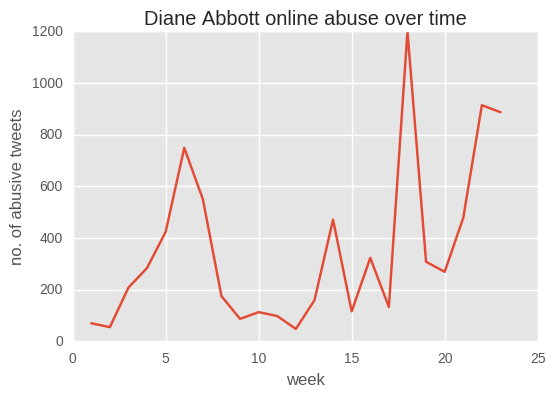

In [87]:
fig = plt.figure()
ax = plt.axes()
plt.plot(dates_to_plot.index.order(), dates_to_plot[dates_to_plot.index.order()])

ax1 = plt.gca()
ax1.grid(True)

plt.xlabel('week')
plt.ylabel("no. of abusive tweets")
plt.title('Diane Abbott online abuse over time')

plt.savefig('../results/DA_peaks_line_chart.png')

/home/katia/.virtualenvs/securaxis/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: order is deprecated, use sort_values(...)
  if __name__ == '__main__':


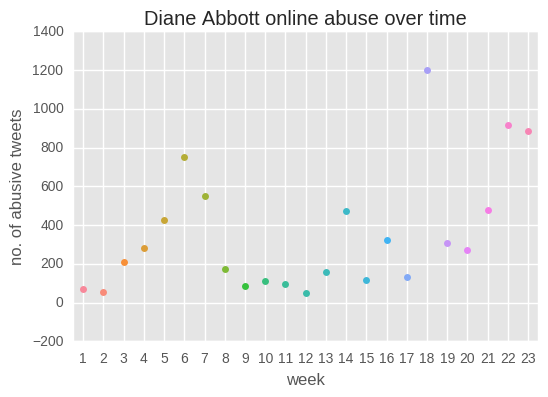

In [88]:
sns.stripplot(x=dates_to_plot.index.order(), y=dates_to_plot[dates_to_plot.index.order()])
ax = plt.gca()
ax.grid(True)

plt.xlabel('week')
plt.ylabel("no. of abusive tweets")
plt.title('Diane Abbott online abuse over time')

plt.savefig('../results/DA_peaks_scatter_chart.png')

### 6. % of abusive tweets v.s. all tweets about Diane Abbott

In [89]:
import csv

In [90]:
all_da_tweets = 0
tweets = set()
for prefix in prefixes:
    if prefix == "total":
        continue
    with open("../data/hackathon/data/"+ prefix + "-17.csv", "r", encoding="ISO-8859-1") as handle:
        rows = csv.reader(handle)
        for row in rows:
            tweet = row[3]
            if "@HackneyAbbott" in tweet and tweet not in tweets:
                all_da_tweets += 1
                tweets.add(tweet)
                
all_da_tweets

140057

In [91]:
da_stats = [8121, 140057-8121]

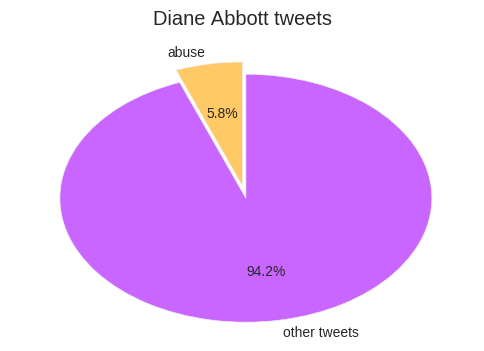

In [92]:
fig1, ax1 = plt.subplots()
explode = (0, 0.1)  # only "explode" the 1nd slice (i.e. 'White')
ax1.pie(
    da_stats,
    explode=explode,
    labels=["abuse", "other tweets"],
    autopct='%1.1f%%',
    shadow=False,
    colors = ["#ffc966", "#c966ff"],#, "#66ffc9"],
    startangle=90)

plt.title('Diane Abbott tweets')
plt.savefig('../results/da_percentage_abuse_pie_chart.png')